In [2]:
import numpy as np
import scipy.stats as ss
import elfi
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals, plot_particles
%matplotlib notebook

In [115]:
z = pyabc.Prior("multivariate_normal", [0,0], [[1, 0.9], [0.9, 1]], name="z")

In [122]:
def simulator(mu1, mu2):
    u1 = np.random.normal(mu1, 1, 30)
    u2 = np.random.normal(mu2, 1, 30)
    a = 1.15
    b=0.5
    x = u1 * a
    y = (u2 / a) + b * (u1**2 + a**2)
    return x+y

In [124]:
y0 = simulator(-1, 1)
y0

array([ 0.75590258,  2.69018207,  2.16135016,  2.50872316,  1.74611928,
        1.82418228,  1.89475797,  2.00063051,  1.16333592,  0.31116992,
        1.07907124,  1.16684684,  1.61391676,  2.44883868,  3.07411481,
        2.50071718,  1.02480486,  2.30851793,  2.72953318,  0.98698598,
        0.81517032,  0.87707914,  1.90874829,  3.41943059,  2.54116295,
        0.6206583 ,  1.18196563,  3.15041641,  3.17277358, -0.17575539])

In [125]:
def total(X):
    return np.sum(X)

def mean(X):
    return np.mean(X)

def cov(X):
    return np.cov(X)

In [126]:
mcmc = pyabc.MCMCSampler(
    priors=[z],
    simulator=simulator,
    summaries=[cov, mean, total],
    observation=y0
)

In [129]:
mcmc.sample(nr_samples=10000, threshold=5, step_size=[0.1, 0.1])

MCMC sampler started with threshold: 5 and number of samples: 10000
Samples:  10000 - Threshold: 5.0000 - Iterations:      61729 - Acceptance rate: 0.161998 - Time:    16.45 s


In [103]:
smc = pyabc.SMCSampler(
    priors=[z],
    simulator=simulator,
    summaries=[cov,mean,mode],
    observation=y0
)

In [104]:
smc.sample(nr_samples=10000, thresholds=[10, 5])

SMC sampler started with thresholds: [1, 0.5] and number of samples: 10000
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
Samples:  10000 - Thresholds: 0.50 - Iterations:      67763 - Acceptance rate: 0.147573 - Time:   171.66 s


<IPython.core.display.Javascript object>


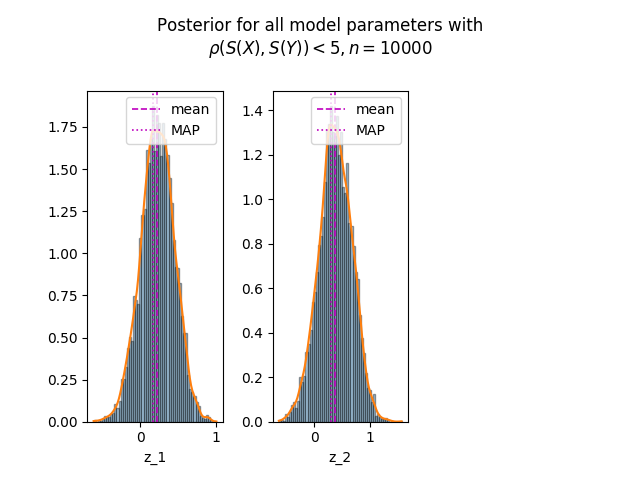

In [130]:
plot_marginals(mcmc, normed=True)